### import opstrat

In [1]:
import opstrat as op

### Version check

In [2]:
op.__version__

'0.0.24'

If you are using an older version upgrade to the latest package using:    

In [ ]:
! pip install opstrat --upgrade

## 1. single_plotter()

Used for plotting payoff diagram for a single option 

Parameters
---
op_type: kind {'c','p'}, default:'c'<br>
   &emsp; Opion type>> 'c': call option, 'p':put option 

spot: int, float, default: 100<br>
   &emsp;Spot Price
   
spot_range: int, float, optional, default: 5<br>
   &emsp;Range of spot variation in percentage 
   
strike: int, float, default: 102<br>
   &emsp;Strike Price

tr_type: kind {'b', 's'} default:'b'<br>
   &emsp;Transaction Type>> 'b': long, 's': short

op_pr: int, float, default: 10<br>
    &emsp;Option Price

### 1.a Default plot

Option type : Call<br>
Spot Price : 100<br>
Spot range : +/- 5% <br>
Strike price: 102 <br>
Position : Long<br>
Option Premium: 10 <br>

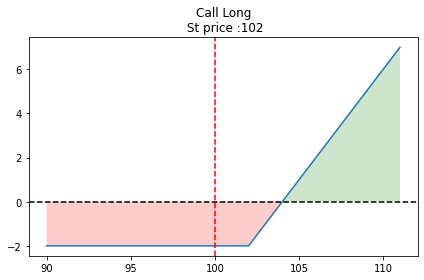

In [11]:
op.single_plotter()

Green : Profit<br>Red : Loss

### 1.b Input parameters 
Strike Price : 450<br>
Spot price : 460<br>
Option type : Put Option<br> 
Position : Short<br>
Option Premium : 12.5<br>

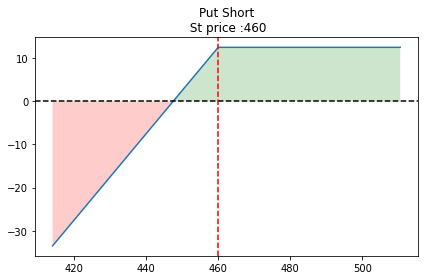

In [12]:
op.single_plotter(spot=460, strike=460, op_type='p', tr_type='s', op_pr=12.5)

## 2. multi_plotter()

Used for plotting a single option <br>
Parameters
----------
spot: int, float, default: 100<br>&emsp; 
   Spot Price
   
spot_range: int, float, optional, default: 20<br>&emsp; 
   Range of spot variation in percentage 
   
op_list: list of dictionary<br>    
   &emsp;Each dictionary must contiain following keys:
   <br>&emsp; 'strike': int, float, default: 720
       <br>&emsp;&emsp;Strike Price
   <br>&emsp; 'tr_type': kind {'b', 's'} default:'b'
      <br>&emsp;&emsp;Transaction Type>> 'b': long, 's': short
   <br>&emsp; 'op_pr': int, float, default: 10
      <br>&emsp;&emsp;Option Price
   <br>&emsp; 'op_type': kind {'c','p'}, default:'c'
      <br>&emsp;&emsp;Opion type>> 'c': call option, 'p':put option 


### 2.a Default plot : The short strangle 
Options trading that involve: <br>&emsp;(a)selling of a slightly out-of-the-money put and <br>&emsp;(b)a slightly out-of-the-money call of the same underlying stock and expiration date. 
<br>spot_range=+/-20%
<br>    spot=100<br>
    <br>Option 1:Short call at strike price 110<br>&emsp;op_type: 'c','strike': 110 'tr_type': 's', 'op_pr': 2
    <br> Option 2 : Short put at strike price 95<br>&emsp;'op_type': 'p', 'strike': 95, 'tr_type': 's', 'op_pr': 6

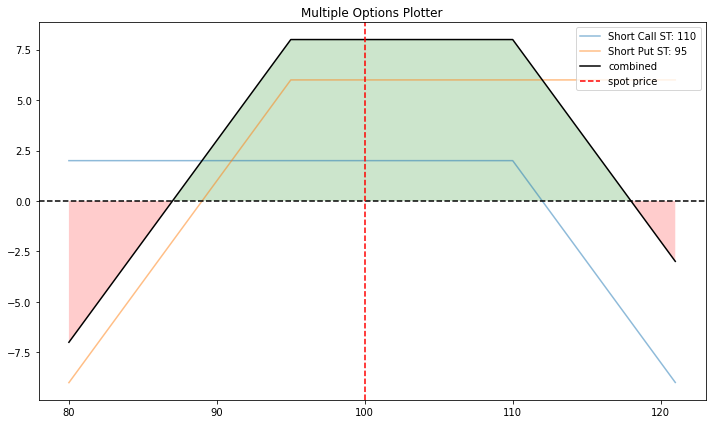

In [13]:
op.multi_plotter()

### 2.b Example: Iron Condor (Option strategy with 4 options)

An iron condor is an options strategy consisting of two puts (one long and one short) and two calls (one long and one short), and four strike prices, all with the same expiration date. 

stock currently trading at 212.26 (Spot Price)<br>

Option 1: Sell a call with a 215 strike, which gives 7.63 in premium<br>
Option 2: Buy a call with a strike of 220, which costs 5.35. <br>
Option 3: Sell a put with a strike of 210 with premium received 7.20<br>
Option 4: Buy a put with a strike of 205 costing 5.52. 

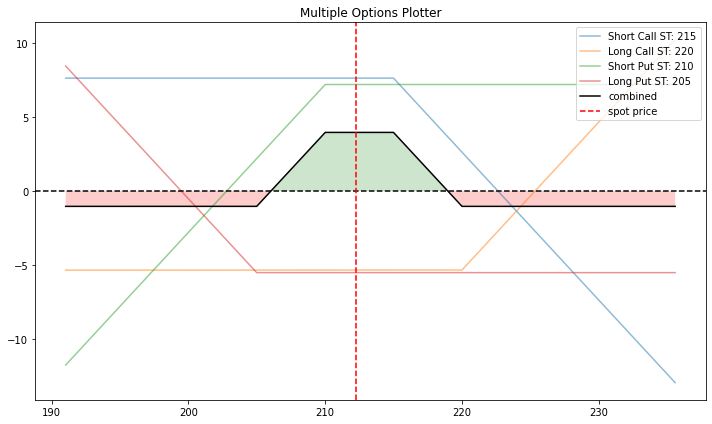

In [14]:
op1={'op_type': 'c', 'strike': 215, 'tr_type': 's', 'op_pr': 7.63}
op2={'op_type': 'c', 'strike': 220, 'tr_type': 'b', 'op_pr': 5.35}
op3={'op_type': 'p', 'strike': 210, 'tr_type': 's', 'op_pr': 7.20}
op4={'op_type': 'p', 'strike': 205, 'tr_type': 'b', 'op_pr': 5.52}

op_list=[op1, op2, op3, op4]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list)

## 3. yf_plotter()

Parameters
----------
ticker: string, default: 'msft' stock ticker for Microsoft.Inc<br>
&emsp;   Stock Ticker<br>
exp: string default: next option expiration date<br>
&emsp;    Option expiration date in 'YYYY-MM-DD' format<br>
   
spot_range: int, float, optional, default: 10<br>
&emsp;   Range of spot variation in percentage <br>
   
op_list: list of dictionary<br>
   
&emsp;   Each dictionary must contiain following keys<br>
&emsp;   'strike': int, float, default: 720<br>
&emsp;&emsp;       Strike Price<br>
&emsp;   'tr_type': kind {'b', 's'} default:'b'<br>
&emsp;&emsp;      Transaction Type>> 'b': long, 's': short<br>
&emsp;   'op_type': kind {'c','p'}, default:'c'<br>
&emsp;&emsp;      Opion type>> 'c': call option, 'p':put option<br> 

### 3.a Default plot

<b>Strangle on Microsoft stock</b><br>
Stock ticker : msft(Microsoft Inc.)<br> &emsp;
Option 1: Buy Call at Strike Price 250<br>&emsp;
Option 2: Buy Put option at Strike price 225

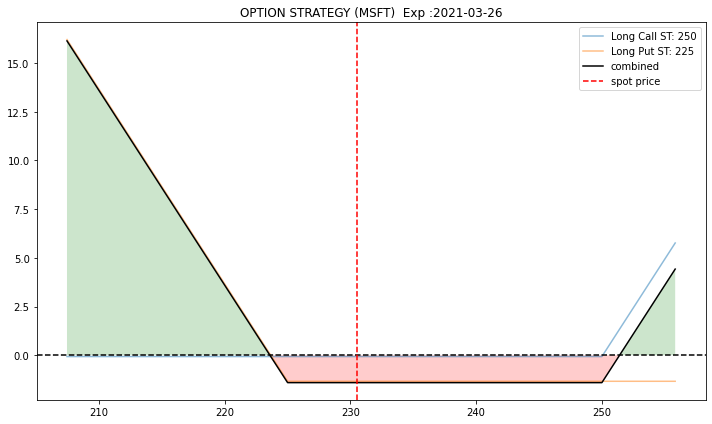

In [15]:
op.yf_plotter()

### 3.b Example: Strangle on Amazon 

Strangle:<br>
A simultaneous purchase of options to buy and to sell a security or commodity at a fixed price, allowing the purchaser to make a profit whether the price of the security or commodity goes up or down.

Stock ticker : AMZN(Amazon Inc.)<br> &emsp;
Option 1: Buy Call at Strike Price 3070<br>&emsp;
Option 2: Buy Put option at Strike price 3070

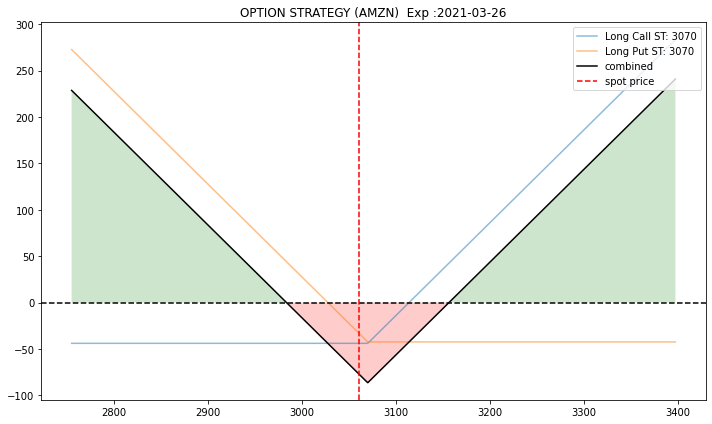

In [16]:
op_1={'op_type': 'c', 'strike':3070, 'tr_type': 'b'}
op_2={'op_type': 'p', 'strike':3070, 'tr_type': 'b'}
op.yf_plotter(ticker='amzn', 
              exp='default', 
              op_list=[op_1, op_2])

## 4. Save figure

Figure can be saved in the current directory setting <i>save=True</i><br>
Filename with extension has to be provided as <i>file</i>.<br>
If no filename is provided, the figure will be saved as fig in png format.

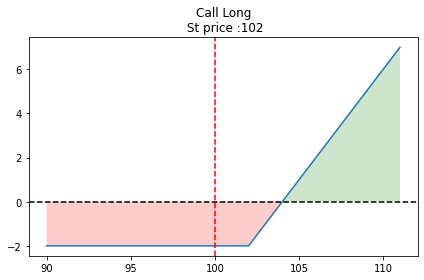

In [17]:
op.single_plotter(save=True,file='simple_option.jpeg')